- Self attention demo based on youtube video:
  - https://www.youtube.com/watch?v=FepOyFtYQ6I
  - added detailed notes and detailed end2end demo

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Create Embeddings

In [ ]:
batch_size = 1
context_length = 8  # number of words in sentence
token_dimensions = 5    # number of tokens associated with each word in sentence
input_text = "The narrator lightly suggested to like and subscribe"

x = torch.randn(batch_size, context_length, token_dimensions)

print(f"The input text is: \"{input_text}\"")
print(f"The number of words in the input text is: {len(input_text.split())}\n")
print(f"The input text is tokenized and randomly embedded as such:\nEach Row is a word in the sentence\nEach word in this case has embedding dimension of 5")
print(f"The batch size represents the number of independent input sequences (or sentences) being processed simultaneously.\n\n {x}")

The input text is: "The narrator lightly suggested to like and subscribe"
The number of words in the input text is: 8

The input text is tokenized and randomly embedded as such:
Each Row is a word in the sentence
Each word in this case has embedding dimension of 5
The batch size represents the number of independent input sequences (or sentences) being processed simultaneously.

 tensor([[[-0.7257, -0.2526,  0.3268, -1.7870,  1.8246],
         [-0.7592,  1.1202,  0.4328,  0.4880, -0.4778],
         [ 1.8166,  1.2236, -0.6612, -0.4214, -0.4998],
         [ 0.0030,  1.2262, -0.7511, -1.0392, -1.2740],
         [ 2.5219,  0.8230, -0.0484,  0.7657,  1.9927],
         [ 0.9559, -0.8261, -0.7600, -0.8562,  0.9490],
         [ 0.3757, -0.6655, -0.7089, -1.1258, -1.7186],
         [-1.4376,  0.7903,  1.1819, -0.6853, -0.1158]]])


In [ ]:
x.shape

torch.Size([1, 8, 5])

# Initialize Q/K/V Matrices

In [ ]:
weight_dimensions = 4
W_query = torch.randn(token_dimensions, weight_dimensions)
W_key = torch.randn(token_dimensions, weight_dimensions)
W_value = torch.randn(token_dimensions, weight_dimensions)
print(f"W_query: \n{W_query}")
print(f"W_key: \n{W_key}")
print(f"W_value: \n{W_value}")

W_query: 
tensor([[-0.3549,  0.6888, -1.8475,  2.0551],
        [ 0.7558,  1.8989,  0.1634, -0.7779],
        [-0.3782,  1.9388,  0.3392, -0.6146],
        [ 0.1113, -1.2743, -0.0768, -1.5890],
        [ 1.2371, -0.0400, -0.7531, -0.1659]])
W_key: 
tensor([[-1.1238,  1.5980,  0.3749,  0.3054],
        [ 0.1530,  0.4081,  0.1188, -0.9981],
        [ 0.9333, -0.5097, -0.2662, -0.5017],
        [-0.2254, -1.2181, -0.2420, -1.4742],
        [ 0.1965, -0.0663, -1.3431,  1.8577]])
W_value: 
tensor([[-0.1726, -0.6899, -0.2131, -0.0090],
        [-0.4398,  0.9675,  0.1771,  0.3217],
        [ 0.0231,  0.3393,  0.2836, -0.7246],
        [ 0.7213, -1.3536,  1.8759,  0.0221],
        [ 1.1208, -1.1661, -0.3736, -1.2629]])


In [ ]:
# printing the shapes
print(f"W_query shape: {W_query.shape}")
print(f"W_key shape: {W_key.shape}")
print(f"W_value shape: {W_value.shape}")

W_query shape: torch.Size([5, 4])
W_key shape: torch.Size([5, 4])
W_value shape: torch.Size([5, 4])


# 1. Compute Attention Scores

In [ ]:
Q = x @ W_query # all the query vectors
K = x @ W_key
V = x @ W_value

In [ ]:
print(f"Note that we are multiplying a 8X5 matrix with 5X4 matrix\nThis gives us a 8X4 matrix for each of Q/K/V\nThis means that each word now has 4 weights for Q/K/V\n")
print(f"Q: \n{Q}\nShape:{Q.shape}\n")
print(f"K: \n{K}\nShape:{K.shape}\n")
print(f"V: \n{V}\nShape:{V.shape}\n")

Note that we are multiplying a 8X5 matrix with 5X4 matrix
This gives us a 8X4 matrix for each of Q/K/V
This means that each word now has 4 weights for Q/K/V

Q: 
tensor([[[-1.9967,  2.1752,  0.8728,  1.0870],
         [-3.0137, -1.5486,  0.2039, -0.2588],
         [ 2.9773,  0.0719,  0.4075,  0.6502],
         [ 0.8649,  0.6996, -0.9332, -1.0033],
         [ 0.0197, -2.8402, -0.4329, -0.3401],
         [ 3.1839, -2.0164, -2.6627, -2.3368],
         [ 3.7926,  2.1223, -0.7384,  0.0586],
         [ 2.3284,  2.5654, -1.8933, -1.8567]]])
Shape:torch.Size([1, 8, 4])

K: 
tensor([[[-0.6510, -3.4445, -5.8930, -2.4487],
         [-0.9062,  0.3995,  0.2874,  0.4378],
         [ 0.7957, -0.8254,  1.6934,  0.6866],
         [-0.0456,  0.0406,  0.9108,  0.8759],
         [ 1.2129,  1.6016, -1.6721, -1.1057],
         [ 2.1940,  8.2014,  3.8594,  0.1499],
         [ 1.6181,  0.7473, -2.0546, -1.7937],
         [-0.0881,  2.3068,  3.6621,  1.7070]]])
Shape:torch.Size([1, 8, 4])

V: 
tensor([[[ 1.496

In [ ]:
print(f"K.transpose(-2, -1) changes the shape of K from [1, 8, 4] to [1, 4, 8].\nThis is required so we can do matrix multiplication of Q and K.transpose(-2, -1)\n")
print(f"K.transpose(-2, -1): \n{K.transpose(-2, -1)}\nShape:{K.transpose(-2, -1).shape}\n")


K.transpose(-2, -1) changes the shape of K from [1, 8, 4] to [1, 4, 8].
This is required so we can do matrix multiplication of Q and K.transpose(-2, -1)

K.transpose(-2, -1): 
tensor([[[-0.6510, -0.9062,  0.7957, -0.0456,  1.2129,  2.1940,  1.6181,
          -0.0881],
         [-3.4445,  0.3995, -0.8254,  0.0406,  1.6016,  8.2014,  0.7473,
           2.3068],
         [-5.8930,  0.2874,  1.6934,  0.9108, -1.6721,  3.8594, -2.0546,
           3.6621],
         [-2.4487,  0.4378,  0.6866,  0.8759, -1.1057,  0.1499, -1.7937,
           1.7070]]])
Shape:torch.Size([1, 4, 8])



In [ ]:
# Compute the dot product
scores = Q @ K.transpose(-2, -1)
print(f"Q @ K.transpose(-2, -1): \n\n{scores}\n\nShape:{scores.shape}\n\n")
print("Note: Q @ K.transpose(-2, -1) gives a 8X8 matrix, since Q was 8X4 and K.transpose(-2, -1) was 4X8\n")


Q @ K.transpose(-2, -1): 

tensor([[[-13.9979,   3.4052,  -1.1599,   1.9264,  -1.5992,  16.9903,  -5.3484,
           10.2455],
         [  6.7283,   2.0576,  -0.9522,   0.0336,  -6.1901, -18.5646,  -5.9885,
           -3.0018],
         [ -6.1795,  -2.2675,   3.4461,   0.8077,   2.3259,   8.7924,   2.8680,
            2.5057],
         [  4.9836,  -1.2118,  -2.1584,  -1.7398,   4.8392,   3.8830,   5.6394,
           -3.5926],
         [ 13.1541,  -1.4259,   1.3935,  -0.8083,  -3.4251, -24.9722,  -0.5913,
           -8.7193],
         [ 26.2861,  -5.4792,  -1.9154,  -4.6989,   7.6682, -20.1785,  13.3073,
          -18.6718],
         [ -5.5711,  -2.7756,   0.0558,  -0.7081,   9.1689,  22.8858,   9.1352,
            1.9572],
         [  5.3515,  -2.4422,  -4.7455,  -3.3527,  12.1514,  18.5630,  12.9052,
           -4.3902]]])

Shape:torch.Size([1, 8, 8])


Note: Q @ K.transpose(-2, -1) gives a 8X8 matrix, since Q was 8X4 and K.transpose(-2, -1) was 4X8



### We now need to do Casual masking (only done in the decoder model of transformers):
- first add a new dimension to scores using torch unsqueze(0) function



In [ ]:
scoresU=scores.unsqueeze(0)
print(f"scoresU: \n{scoresU}\nShape:{scoresU.shape}\n")

scoresU: 
tensor([[[[-13.9979,   3.4052,  -1.1599,   1.9264,  -1.5992,  16.9903,  -5.3484,
            10.2455],
          [  6.7283,   2.0576,  -0.9522,   0.0336,  -6.1901, -18.5646,  -5.9885,
            -3.0018],
          [ -6.1795,  -2.2675,   3.4461,   0.8077,   2.3259,   8.7924,   2.8680,
             2.5057],
          [  4.9836,  -1.2118,  -2.1584,  -1.7398,   4.8392,   3.8830,   5.6394,
            -3.5926],
          [ 13.1541,  -1.4259,   1.3935,  -0.8083,  -3.4251, -24.9722,  -0.5913,
            -8.7193],
          [ 26.2861,  -5.4792,  -1.9154,  -4.6989,   7.6682, -20.1785,  13.3073,
           -18.6718],
          [ -5.5711,  -2.7756,   0.0558,  -0.7081,   9.1689,  22.8858,   9.1352,
             1.9572],
          [  5.3515,  -2.4422,  -4.7455,  -3.3527,  12.1514,  18.5630,  12.9052,
            -4.3902]]]])
Shape:torch.Size([1, 1, 8, 8])



In [ ]:
# Get the size of the sequence (context length)
context_length = scoresU.shape[-1]
print(f"context_length: {context_length}\n")

context_length: 8



### Creates an upper triangular matrix with the diagonal and above filled. Setting the upper triangle to -inf ensures that softmax outputs 0 for those positions.

In [ ]:
# Create a causal mask (upper triangular part set to -inf)
causal_mask = torch.triu(torch.full((context_length, context_length), float('-inf')), diagonal=1)
print(f"causal_mask: \n{causal_mask}\nShape:{causal_mask.shape}\n")

causal_mask: 
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
Shape:torch.Size([8, 8])



In [ ]:
# Apply the mask to scores
masked_scores = scores + causal_mask
print(f"masked_scores: \n{masked_scores}\nShape:{masked_scores.shape}\n")

masked_scores: 
tensor([[[-13.9979,     -inf,     -inf,     -inf,     -inf,     -inf,     -inf,
              -inf],
         [  6.7283,   2.0576,     -inf,     -inf,     -inf,     -inf,     -inf,
              -inf],
         [ -6.1795,  -2.2675,   3.4461,     -inf,     -inf,     -inf,     -inf,
              -inf],
         [  4.9836,  -1.2118,  -2.1584,  -1.7398,     -inf,     -inf,     -inf,
              -inf],
         [ 13.1541,  -1.4259,   1.3935,  -0.8083,  -3.4251,     -inf,     -inf,
              -inf],
         [ 26.2861,  -5.4792,  -1.9154,  -4.6989,   7.6682, -20.1785,     -inf,
              -inf],
         [ -5.5711,  -2.7756,   0.0558,  -0.7081,   9.1689,  22.8858,   9.1352,
              -inf],
         [  5.3515,  -2.4422,  -4.7455,  -3.3527,  12.1514,  18.5630,  12.9052,
           -4.3902]]])
Shape:torch.Size([1, 8, 8])



# 2. Compute Attention Weights
- Note that softmax makes the -inf to 0 ( this is how we acheieved the masking)

remember we did this before:
- import torch.nn.functional as F

In [ ]:
# Compute the attention weights with softmax (scaled by sqrt of weight dimensions)
attention_weights = F.softmax(masked_scores / (weight_dimensions ** 0.5), dim=-1)
print(f"attention weights:\nF.softmax(scores / (weight_dimensions ** 0.5), dim=-1): \n\n{attention_weights}\n\nShape:{attention_weights.shape}\n\n")
print("Note: F.softmax(scores / (weight_dimensions ** 0.5), dim=-1) gives a 8X8 matrix, since Q @ K.transpose(-2, -1) was 8X8\n")

attention weights:
F.softmax(scores / (weight_dimensions ** 0.5), dim=-1): 

tensor([[[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.1176e-01, 8.8240e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [7.6250e-03, 5.3916e-02, 9.3846e-01, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.0256e-01, 4.0755e-02, 2.5387e-02, 3.1298e-02, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9536e-01, 6.7919e-04, 2.7811e-03, 9.2489e-04, 2.4996e-04,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9991e-01, 1.2654e-07, 7.5176e-07, 1.8692e-07, 9.0601e-05,
          8.1338e-11, 0.0000e+00, 0.0000e+00],
         [6.6032e-07, 2.6717e-06, 1.1006e-05, 7.5119e-06, 1.0484e-03,
          9.9790e-01, 1.0308e-03, 0.0000e+00],
         [1.2285e-03, 2.4946e-05, 7.8855e-06, 1.5823e-05, 3.6810e-02,
          9.0825e-01, 5.3658e-02, 

## Note:
- **attention_weights[0][0]** accesses the attention weights for the first query position (first word in the sentence). This is a vector of size 8, where each value indicates how much attention the first word places on every word (including itself)..
- since they were normalized, the sum would give 0

In [ ]:
attention_weights[0][0]

tensor([1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
sum(attention_weights[0][0])

tensor(1.)

# 3. Update the Meaning

In [ ]:
context_vectors = attention_weights @ V
context_vectors

tensor([[[ 1.4962,  2.2611,  1.1062,  1.2598],
         [ 1.3752,  2.0607,  1.1085,  0.9834],
         [-2.0228, -1.2476, -0.2574,  2.3744],
         [ 1.2489,  2.0363,  0.9800,  1.1638],
         [ 1.4813,  2.2482,  1.0991,  1.2603],
         [ 1.4959,  2.2611,  1.1060,  1.2594],
         [ 2.9946, -0.6104, -2.8497, -6.7213],
         [ 2.7343, -0.4513, -2.7010, -6.2030]]])

### **Explanation:**

- Let's look at the first row:

1.	**Features Represent Contextualized Information:**
- The 4 values ([1.4962, 2.2611, 1.1062, 1.2598]) represent features extracted from the self-attention mechanism.
- These features do not directly measure the importance of the word “The” alone but instead describe its contextualized meaning based on how it interacts with other words in the sentence.
2.	**Contextual Importance:**
- The values encode information about how “The” relates to other words in the sentence.


**For example:**

•	The representation might reflect that “The” is part of a noun phrase (“The narrator”) and is less semantically significant than a verb like “suggested.”

3.	**Features Are Learned Representations:**
- The 4 features are learned by the model during training to be useful for the specific task (e.g., translation, summarization, or classification).
- These features might capture linguistic properties, such as:
- Syntactic role: Its position and relation to nearby words.
- Semantic contribution: How much meaning it adds to the overall sentence.

4.	**Self-Attention’s Contribution:**
•	The self-attention mechanism updates the representation of “The” by combining information from all other words in the sentence.
•	This means the features reflect “The” in context rather than in isolation.

# Next Step:
- Feed Context Vectors into a Feedforward Neural Network
- **super(FeedForward, self).\__init__()** ensures the parent class (nn.Module) is properly initialized.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the feedforward network
class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First dense layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second dense layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = self.fc2(x)          # Second layer (no activation in this example)
        return x

# Initialize the feedforward network
input_dim = 4  # Same as the dimension of context vectors
hidden_dim = 8  # Example hidden dimension
output_dim = 4  # Output dimension (same as input in this case)
feedforward = FeedForward(input_dim, hidden_dim, output_dim)

# Apply the feedforward network
output_vectors = feedforward(context_vectors)

# Print the results
print("Input Context Vectors:")
print(context_vectors)
print("\nOutput Vectors After Feedforward Network:")
print(output_vectors)

Input Context Vectors:
tensor([[[ 1.4962,  2.2611,  1.1062,  1.2598],
         [ 1.3752,  2.0607,  1.1085,  0.9834],
         [-2.0228, -1.2476, -0.2574,  2.3744],
         [ 1.2489,  2.0363,  0.9800,  1.1638],
         [ 1.4813,  2.2482,  1.0991,  1.2603],
         [ 1.4959,  2.2611,  1.1060,  1.2594],
         [ 2.9946, -0.6104, -2.8497, -6.7213],
         [ 2.7343, -0.4513, -2.7010, -6.2030]]])

Output Vectors After Feedforward Network:
tensor([[[-0.0686, -0.2526, -0.2422, -0.3847],
         [-0.0456, -0.1881, -0.2578, -0.3903],
         [-0.2518,  0.1164,  0.0683, -0.1425],
         [-0.0733, -0.2142, -0.2418, -0.3633],
         [-0.0690, -0.2512, -0.2418, -0.3834],
         [-0.0686, -0.2525, -0.2423, -0.3847],
         [ 0.9509, -0.1000,  0.1879,  0.3600],
         [ 0.8633, -0.0643,  0.1646,  0.3132]]], grad_fn=<ViewBackward0>)


### Add Residual Connections for stability

In [ ]:
output_vectors += context_vectors
output_vectors

tensor([[[ 1.4277,  2.0086,  0.8640,  0.8751],
         [ 1.3296,  1.8726,  0.8507,  0.5931],
         [-2.2747, -1.1312, -0.1891,  2.2318],
         [ 1.1756,  1.8222,  0.7382,  0.8004],
         [ 1.4123,  1.9969,  0.8573,  0.8770],
         [ 1.4273,  2.0086,  0.8638,  0.8747],
         [ 3.9456, -0.7104, -2.6618, -6.3613],
         [ 3.5976, -0.5155, -2.5363, -5.8899]]], grad_fn=<AsStridedBackward0>)

## Normalize to stabilize and scale the results
- each row will have mean of 0 with standard deviation of 1

In [ ]:
norm = nn.LayerNorm(output_vectors.size()[-1])
normalized_output = norm(output_vectors)
normalized_output

tensor([[[ 0.2839,  1.5162, -0.9118, -0.8883],
         [ 0.3442,  1.4564, -0.6365, -1.1642],
         [-1.1659, -0.4765,  0.0914,  1.5509],
         [ 0.0962,  1.5962, -0.9184, -0.7740],
         [ 0.2706,  1.5225, -0.9176, -0.8755],
         [ 0.2836,  1.5163, -0.9115, -0.8884],
         [ 1.4510,  0.1982, -0.3269, -1.3223],
         [ 1.4364,  0.2389, -0.3494, -1.3258]]],
       grad_fn=<NativeLayerNormBackward0>)

---

# Notes on using pre-trained model for Embeddings
- often used for RAG workflow

## Encoder-Only Models:
- Models like **all-MiniLM-L6-v2** consist of stacked **encoder layers**.
- Each encoder layer includes:
  - Multi-headed self-attention
  - Feedforward neural networks
  - Residual connections

## Decoder-Only Models (e.g., OpenAI GPT):
- Decoder-only models like GPT can generate embeddings.
- For embedding tasks:
  - They disable causal masking and use the **final hidden states** from the decoder as embeddings.


# Note on Casual Masking

1. **Causal Masking in Transformer Architectures**
- Causal Masking is applied **only in the decoder block** of a Transformer model.
- Its purpose is to **ensure that the model cannot “see” future tokens** when predicting the next word during autoregressive generation.

**Why It’s Needed in Decoders:**
- In tasks like text generation (e.g., GPT models), the decoder predicts one token at a time in sequence:
- When predicting the  i -th token, the model must only attend to previous tokens (tokens 1 to  i-1 ).
- Causal masking ensures that the decoder does not attend to future tokens during training.

2. **Encoder Blocks Do Not Use Causal Masking**
- In the encoder block of a Transformer:
	- The self-attention mechanism operates over the entire input sequence.
	- Tokens are allowed to attend to all other tokens (both before and after) in the input sentence.

**Why?**

- The encoder’s goal is to create a contextualized representation of the input tokens by considering relationships between all tokens in the input simultaneously.
- There’s no need to restrict attention to past tokens, as the task doesn’t involve sequential generation.

# **Multi-Headed Self-Attention**

In **multi-headed self-attention**, multiple attention heads run independently to capture different types of relationships:

1. **Independent Attention Heads**:
   - Each head has its own \( W_Q, W_K, W_V \), producing unique Q, K, V matrices.
2. **Combine Outputs**:
   - Outputs from all heads are concatenated and passed through a final linear transformation.

# Recap of Sigmoid function showing $-\infty$ value when passed through the function approaches 0

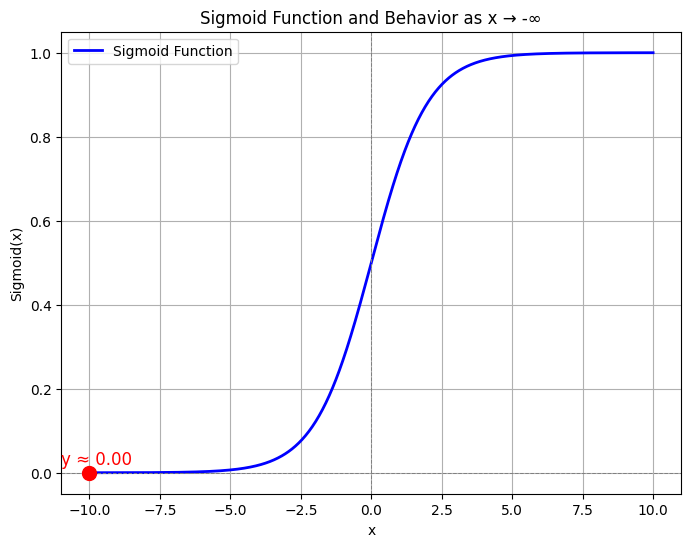

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function Definition
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 1000)  # Cover a wide range to approximate -inf and +inf
y = sigmoid(x)

# Highlight the point where x approaches -inf (effectively -10 here)
x_negative_infinity = -10  # Approximating -inf
y_negative_infinity = sigmoid(x_negative_infinity)

# Plot the Sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Sigmoid Function", color="blue", linewidth=2)

# Highlight the point where x → -inf (y ≈ 0)
plt.scatter(x_negative_infinity, y_negative_infinity, color="red", s=100, zorder=5)
plt.text(x_negative_infinity - 1, y_negative_infinity + 0.02,
         f"y ≈ {y_negative_infinity:.2f}", color="red", fontsize=12)

# Add axis labels and title
plt.title("Sigmoid Function and Behavior as x → -∞")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")

# Add grid and legend
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)  # y = 0 line
plt.axvline(0, color="gray", linestyle="--", linewidth=0.7)  # x = 0 line
plt.legend()
plt.grid(True)

# Show the plot
plt.show()